# Hierarchy of *test suite* classes

In [1]:
from pathlib import Path
from tempfile import TemporaryDirectory
import urllib

from IPython.core.display import HTML
import graphviz

### Define helpers

*Adapted from [codegraph](https://github.com/EliahKagan/codegraph/blob/main/builtin_types.ipynb).*

In [2]:
def make_hyperlink(url, inner_html):
    """Make a hyperlink that opens a page in a new browser tab when clicked."""
    style = 'font-size: 1.3rem; background-color: #f6f6f9'
    tag_attributes = f'href="{url}" target="_blank" style="{style}"'
    return HTML(f'<a {tag_attributes}>{inner_html}</a>')

In [3]:
def make_graphvizonline_link(graph):
    """Make a Jupyter/IPython link to open a graph in GraphvizOnline."""
    quoted = urllib.parse.quote(str(graph))
    url = f'https://dreampuf.github.io/GraphvizOnline/#{quoted}'
    return make_hyperlink(url, 'Open in GraphvizOnline')

### Build the graph

In [4]:
with TemporaryDirectory() as dir_name:
    ! pyreverse --output-directory={dir_name} tests
    classes = graphviz.Source.from_file(Path(dir_name) / 'classes.dot')

parsing /workspaces/EmbeddingScratchwork/tests/__init__.py...
parsing /workspaces/EmbeddingScratchwork/tests/test_backoff.py...
parsing /workspaces/EmbeddingScratchwork/tests/_audit.py...
parsing /workspaces/EmbeddingScratchwork/tests/_helpers.py...
parsing /workspaces/EmbeddingScratchwork/tests/__init__.py...
parsing /workspaces/EmbeddingScratchwork/tests/test_keys.py...
parsing /workspaces/EmbeddingScratchwork/tests/test_cached_embeddings.py...
parsing /workspaces/EmbeddingScratchwork/tests/_bases.py...
parsing /workspaces/EmbeddingScratchwork/tests/test_cached_caching.py...
parsing /workspaces/EmbeddingScratchwork/tests/test_embed.py...


In [5]:
classes = classes.unflatten(stagger=4)

### Show the graph

##### Show on GraphvizOnline

In [6]:
make_graphvizonline_link(classes)

##### Show in this notebook - scaled down

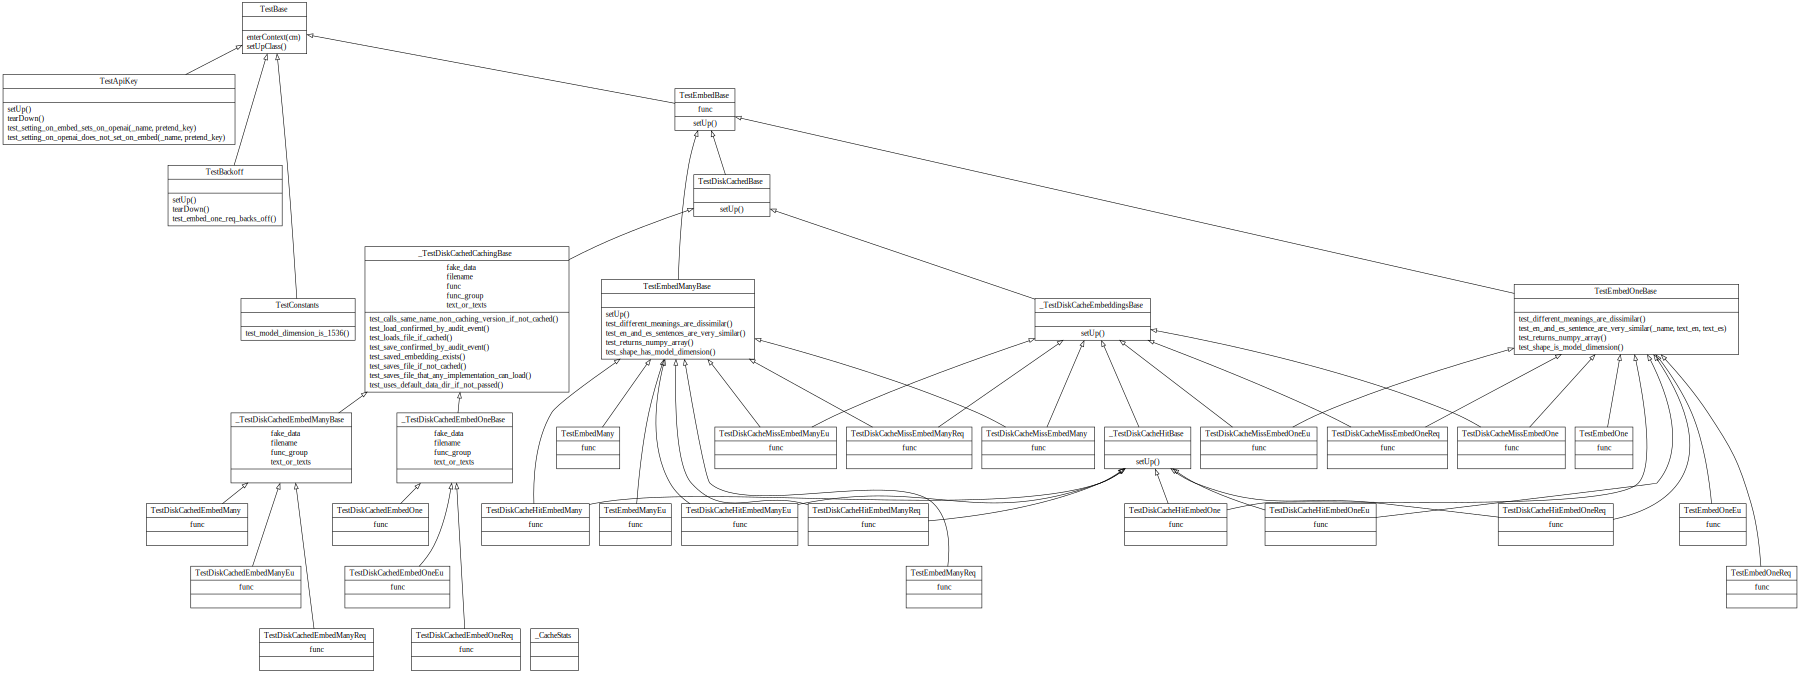

In [7]:
size = 25  # Adjust as desired.
graphviz.Source(classes.source.replace('graph [', f'graph [size="{size}",', 1))

##### Show in this notebook - full size

*Scroll down and to the right.*

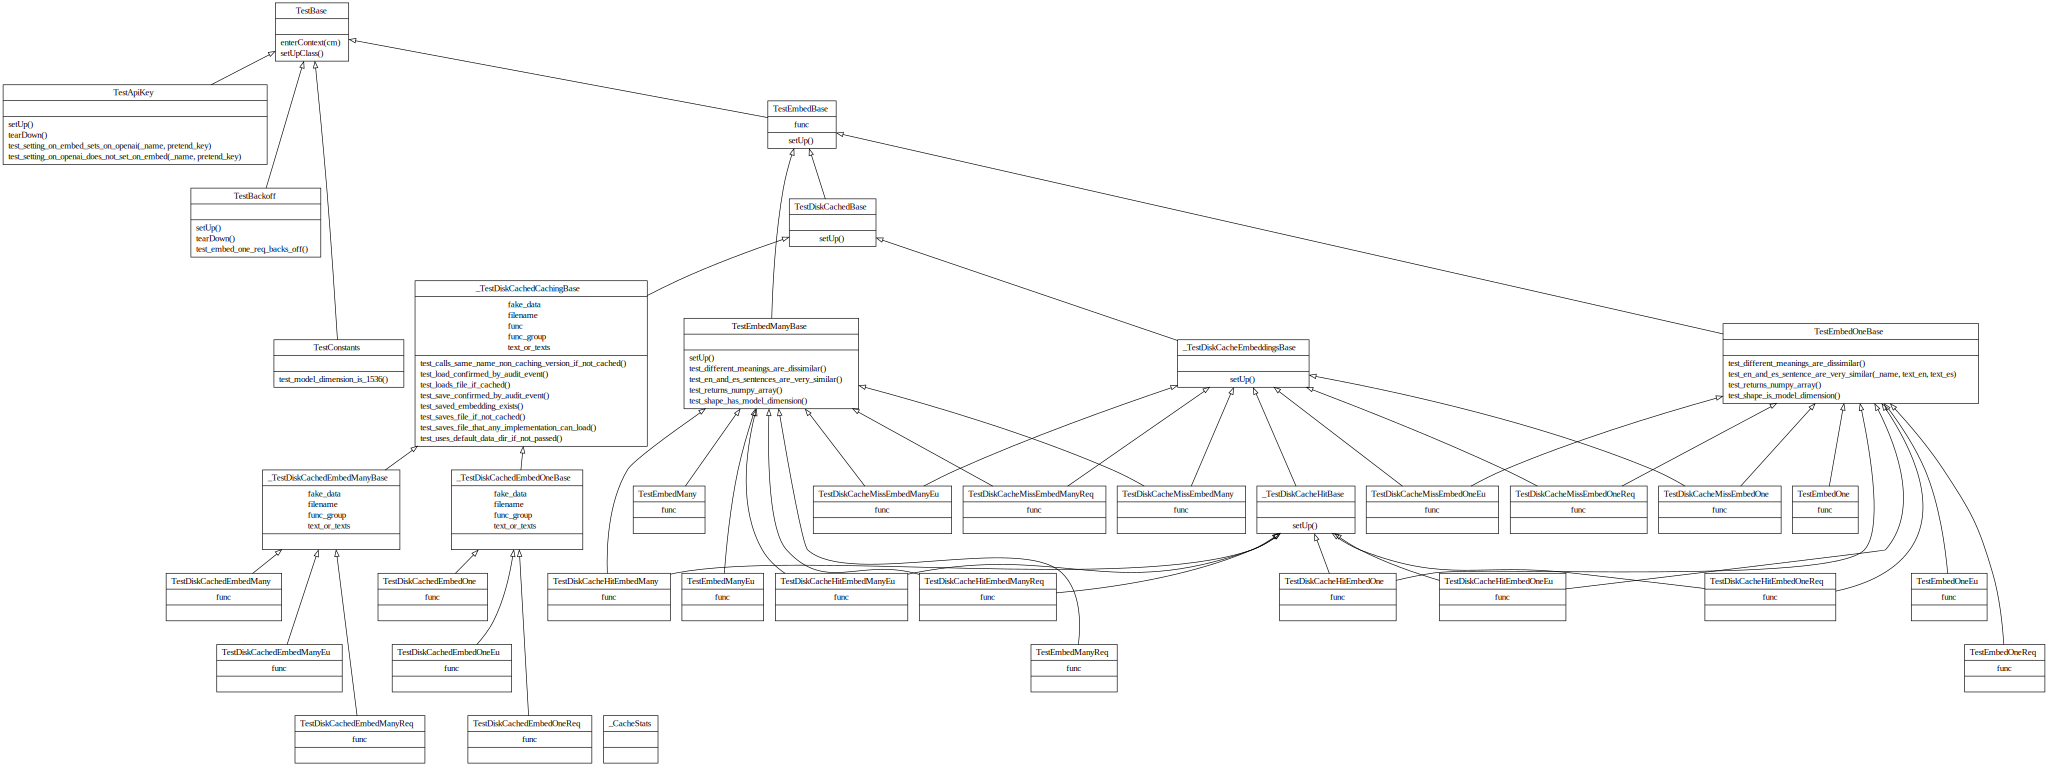

In [8]:
classes